In [7]:
import pandas as pd
wdata=pd.read_excel(r"Part2 - Company.xlsx")

In [8]:
wdata.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [9]:
wdata.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [12]:
import seaborn as sns
wdata.corr()

,A,B,C,D
A,1.000000,0.772930,0.829806,0.797586
B,0.772930,1.000000,0.855366,0.791915
C,0.829806,0.855366,1.000000,0.821135
D,0.797586,0.791915,0.821135,1.000000


<AxesSubplot:>

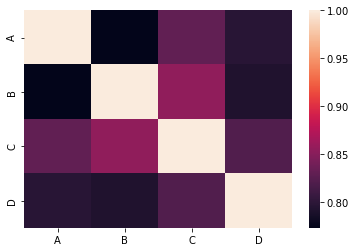

In [13]:
sns.heatmap(wdata.corr())

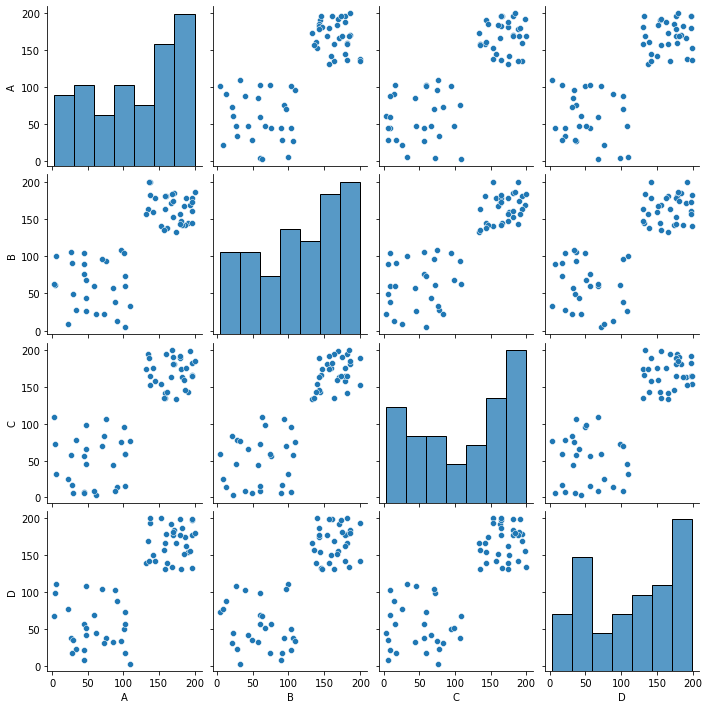

In [14]:
sns.pairplot(wdata)

In [15]:
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [16]:
dataAttr=wdata.iloc[:,0:4]
dScaled=dataAttr.apply(zscore)

In [17]:
wdata.Quality.unique()

array(['Quality A', 'Quality B', nan], dtype=object)

In [19]:
final_model=KMeans(2)
final_model.fit(dScaled)
prediction=final_model.predict(dScaled)

In [21]:
wdata["GROUP"] = prediction
dScaled["GROUP"] = prediction
print("Groups Assigned : \n")
wdata.head()

Groups Assigned : 



,A,B,C,D,Quality,GROUP
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1


In [22]:
wdataClust = wdata.groupby(['GROUP'])
wdataClust.mean()

,A,B,C,D
GROUP,,,,
0,169.30303,163.909091,168.666667,166.606061
1,58.75000,60.928571,49.750000,53.000000


array([[<AxesSubplot:title={'center':'A'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'B'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'C'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'D'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

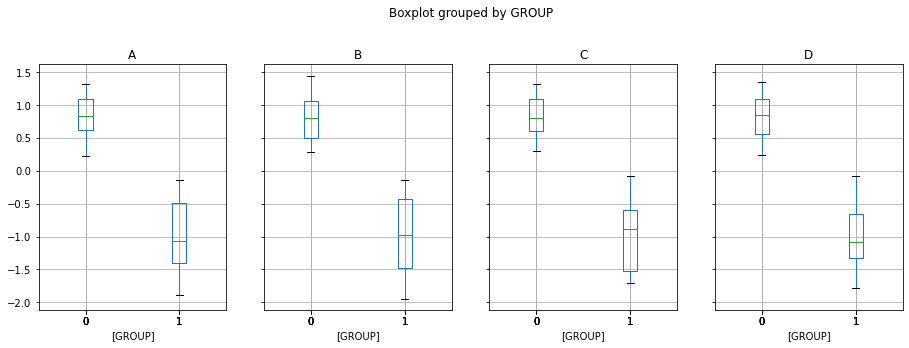

In [23]:
dScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))